Turned in by : Robert Daniels, 4/12/2022, after running instructor provided notebook. 

# Python Pandas - DataFrame Tutorial - Hands On

## What's Pandas?

- Term Pandas derived from term "panel data", an econometrics term for data sets that include observations over multiple time periods for same individuals. 

- Pandas is a high-level data manipulation tool built on Numpy package and its key data structure is called DataFrame. 

- Data in pandas is used for statistical analysis in SciPy, plotting functions in Matplotlib, and machine learning algorithms in Scikit-learn. 

- DataFrames allow us to store and manipulate tabular data in rows of observations and columns of variables.

## Core components of pandas: Series and DataFrames

- Primary two components of pandas are Series and DataFrame.
- A Series is a column, and a DataFrame is a multi-dimensional table made up of a collection of Series.
- DataFrames and Series are similar, many operations that can be done in one can be done with the other. 

***=============================================================================================================***
<br>
*** PART - 1 ***
<br>
***=============================================================================================================***

## Creating DataFrames - Using Datasets

### Read data from CSV files to create dataframe

In [1]:
# First step is to import Pandas library…

import pandas as pd

In [2]:
df = pd.read_csv('purchases.csv')

In [3]:
#Display values in data frame

df

,customer,apples,bananas
0,James,2,0
1,Robin,3,4
2,Mary,0,6
3,Bobby,4,3


- CSVs don't have indexes like DataFrames.
- Hence, we can designate index_col when reading file.

In [4]:
df = pd.read_csv('purchases.csv', index_col=0)

In [5]:
#Display values in data frame

df

,apples,bananas
customer,,
James,2,0
Robin,3,4
Mary,0,6
Bobby,4,3


## Most important DataFrame operations

- DataFrames support many methods and operations that are crucial to any analysis. 
- Let's load IMDB movies dataset from a CSV and designate movie titles to our index.

In [6]:
movies_df = pd.read_csv("moviedata.csv", index_col="Title")

### Viewing Movie data

- First thing to do when opening new dataset is print out few rows to preview data. 
- We do this with `.head()`.

In [7]:
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


- `.head()` outputs **first** five rows of DataFrame by default.
- But we could also pass a number as well: `movies_df.head(3)` to view top three rows. 

In [8]:
movies_df.head(3)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


- To preview **last** five rows use `.tail()`. 
- `tail()` also accepts a number, and we preview bottom two rows.:

In [9]:
movies_df.tail(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


### Getting info about your data

- `.info()` provides essential details about our dataset, such as number of rows and columns.
- number of non-null values, what type of data is in each column, and how much memory our DataFrame is using. 

In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


- Another useful command is `.shape`, which outputs a tuple of (rows, columns):

In [11]:
movies_df.shape

(1000, 11)

- Note that `.shape` has no parentheses and is a simple tuple of format (rows, columns). 
- So we have **1000 rows** and **11 columns** in our movies DataFrame.

### Handling duplicates

- Our dataset does not have duplicate rows, but it is important to verify it anytime we load dataset. 

To demonstrate, let's simply just double up our movies DataFrame by appending it to itself:

In [12]:
dup_df = movies_df.append(movies_df)

dup_df.shape

(2000, 11)

- Using `append()` will return a copy without affecting original DataFrame. 
- We are capturing this copy in `dup_df` without impacting our original 'movies_df' data.

**Now we can try dropping duplicates:**

In [13]:
dup_df = dup_df.drop_duplicates()

dup_df.shape

(1000, 11)

- If we want to work on a dataset and assign result to same dataset as above, there is a better way of doing it.
- Pandas has `inplace` keyword argument on many of its methods. 
- Using `inplace=True` will modify DataFrame object in place as shown below:

In [14]:
dup_df.drop_duplicates(inplace=True)

Another important argument for `drop_duplicates()` is `keep`, which has three possible options:

* `first`: (default) Drop duplicates except for first occurrence.
* `last`: Drop duplicates except for last occurrence.
* `False`: Drop all duplicates.

- If not defined, it defaults to `first`. 
- `False`,will drop all duplicates. 
- If two rows are the same then both will be dropped. 

In [15]:
# See what happens to `dup_df`, when we use 'False':

dup_df = movies_df.append(movies_df)  # make a new copy

dup_df.drop_duplicates(inplace=True, keep=False)

dup_df.shape

(0, 11)

Since all rows were duplicates, `keep=False` dropped them all resulting in zero rows being left over. 

### Column Names cleanup

- Sometimes, we may not have the desired column names in our datasets. 
- It is possible to overwrite the column names, if needed.

Here's how to print the column names of our dataset:

In [16]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

We can use `.rename()` method to rename certain or all columns via a `dict`. 

In [17]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)


movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

- What if we want to lowercase all names? 
- Instead of using `.rename()` we could assign a list of names to columns:

In [18]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']


movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

- Converting to lower case, one at a time is too much work. 
- Instead of just renaming each column manually we can do this:

In [19]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

### How to work with missing values

- Most commonly we will see Python's `None` or NumPy's `np.nan`.<br>  

**There are two options in dealing with nulls:**<br> 

- Get rid of rows or columns with nulls
- Replace nulls with non-null values, a technique known as **imputation**<br><br>

- Let's calculate total number of nulls in each column of our dataset. 
- First step is to check which cells in our DataFrame are null:

In [20]:
movies_df.isnull()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


- `isnull()` returns DataFrame where each cell is either True or False depending on that cell's null status.

- To count the number of nulls in each column we use an aggregate function for summing: 

In [21]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

`.isnull()` just by iteself isn't very useful, and is usually used in conjunction with other methods, like `sum()`.

We can see now that our data has **128** missing values for `revenue_millions` and **64** missing values for `metascore`.

#### Removing rows with null values

Overall, removing null data is only suggested if we have a small amount of missing data.

Removing rows with nulls is pretty simple:

In [22]:
movies_df.dropna()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Resident Evil: Afterlife,994,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
Project X,995,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0


**We can also drop columns with null values by setting `axis=1`:**

In [23]:
movies_df.dropna(axis=1)

,rank,genre,description,director,actors,year,runtime,rating,votes
Title,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699


In [24]:
movies_df.shape

(1000, 11)

***=============================================================================================================***
<br>
*** PART - 2 ***
<br>
***=============================================================================================================***

### Replacing Missing Values

- There may be times where dropping every row with null value removes too much from our dataset.
- So instead we can replace null with another value, mostly **mean** or **median** of that column.<br> 

In [25]:
#Replacing missing values in revenue_millions column. 
revenue = movies_df['revenue_millions']

We can use square brackets to select columns in a DataFrame. 

`revenue` now contains a Series:

In [26]:
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: revenue_millions, dtype: float64

Different formatting than a DataFrame, but still has `Title` index. 

- We can replace missing values of revenue using mean. 

In [27]:
#Calculating mean value for revenue:
revenue_mean = revenue.mean()

In [28]:
revenue_mean

82.95637614678898

Fill nulls with Revenue Mean using `fillna()`:

In [29]:
revenue.fillna(revenue_mean, inplace=True)

- We have replaced all nulls in `revenue` with mean of the column. 
- By using `inplace=True` we have updated the original `movies_df`:

In [30]:
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

### Understanding dataset variables

Using `describe()` on entire DataFrame, we can get summary of distribution of continuous variables:

In [31]:
movies_df.describe()

,rank,year,runtime,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [32]:
movies_df['actors'].describe()

count                                                  1000
unique                                                  996
top       Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...
freq                                                      2
Name: actors, dtype: object

Genre column has 207 unique values, top value is Action/Adventure/Sci-Fi, which shows up 50 times (freq).

`.value_counts()` can tell frequency of all values in a column:

In [33]:
movies_df['actors'].value_counts().head(10)

Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson     2
Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon             2
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                    2
Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett             2
Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana                    1
Ethan Hawke, David Thewlis, Emma Watson,Dale Dickey                     1
Leonardo DiCaprio, Djimon Hounsou, Jennifer Connelly, Kagiso Kuypers    1
Mark Wahlberg, Dwayne Johnson, Anthony Mackie,Tony Shalhoub             1
Mark Wahlberg, Seth MacFarlane, Amanda Seyfried, Jessica Barth          1
Isabelle Huppert, André Marcon, Roman Kolinka,Edith Scob                1
Name: actors, dtype: int64

#### Relationships between continuous variables

We can use correlation method `.corr()` to generate relationship between each continuous variable:

In [34]:
movies_df.corr()

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


- Positive numbers indicate a positive correlation — If one goes up other also goes up.<br> 
- Negative numbers represent an inverse correlation — If one goes up other goes down.<br> 
- 1.0 indicates a perfect correlation. 

### DataFrame slicing, selecting, extracting

Below are methods for slicing, selecting, and extracting data.

#### By column

In [35]:
actors_col = movies_df['actors']

type(actors_col)

pandas.core.series.Series

This will return a *Series*. To extract a column as a *DataFrame*, we need to pass a list of column names.

In [36]:
actors_col = movies_df[['actors']]

type(actors_col)

pandas.core.frame.DataFrame

Since it's just a list, adding another column name is easy:

In [37]:
subset = movies_df[['actors', 'rating']]

In [38]:
subset.head()

,actors,rating
Title,,
Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",8.1
Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",7.0
Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",7.3
Sing,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",7.2
Suicide Squad,"Will Smith, Jared Leto, Margot Robbie, Viola D...",6.2


Let's look at getting data by rows.

#### By rows

For rows, we have two options: 

- `.loc` - **loc**ates by name
- `.iloc`- **loc**ates by numerical **i**ndex

Dataset is indexed by movie Title, so to use `.loc` we give it Title of a movie:

In [39]:
prom = movies_df.loc["Suicide Squad"]

prom

rank                                                                5
genre                                        Action,Adventure,Fantasy
description         A secret government agency recruits some of th...
director                                                   David Ayer
actors              Will Smith, Jared Leto, Margot Robbie, Viola D...
year                                                             2016
runtime                                                           123
rating                                                            6.2
votes                                                          393727
revenue_millions                                               325.02
metascore                                                        40.0
Name: Suicide Squad, dtype: object

`iloc` will give numerical index of Suicide Squad:

In [40]:
prom = movies_df.iloc[1]

`loc` and `iloc` are similar to Python `list` slicing. Let's select multiple rows.

In [41]:
movie_subset = movies_df.loc['Prometheus':'Sing']

In [42]:
movie_subset = movies_df.iloc[1:4]

In [43]:
movie_subset

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


One important difference between using `.loc` and `.iloc` to select multiple rows is that `.loc` includes movie *Sing* in result, but when using `.iloc` we're getting rows 1:4 but movie at index 4 (*Suicide Squad*) is not included. 

Slicing with `.iloc` follows same rules as slicing with lists, object at index at end is not included.

#### Filter data
Filter movies DataFrame to show only films directed by Ridley Scott.

In [44]:
movies_df[movies_df['director'] == "Ridley Scott"].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
Robin Hood,388,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0
Exodus: Gods and Kings,517,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0


Below is conditional selections using numerical values by filtering DataFrame by ratings:

In [45]:
movies_df[movies_df['rating'] >= 7.5].head(3)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Fantastic Beasts and Where to Find Them,11,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0


Using logical operators `|` for "or" and `&` for "and".

Filter DataFrame to show only movies by Christopher Nolan OR Ridley Scott:

In [46]:
movies_df[(movies_df['director'] == 'James Gunn') | (movies_df['director'] == 'David Yates')].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Fantastic Beasts and Where to Find Them,11,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0
The Legend of Tarzan,108,"Action,Adventure,Drama","Tarzan, having acclimated to life in London, i...",David Yates,"Alexander Skarsgård, Rory J. Saper, Christian ...",2016,110,6.3,117590,126.59,44.0
Harry Potter and the Deathly Hallows: Part 2,115,"Adventure,Drama,Fantasy","Harry, Ron and Hermione search for Voldemort's...",David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",2011,130,8.1,590595,380.96,87.0
Harry Potter and the Order of the Phoenix,315,"Adventure,Family,Fantasy",With their warning about Lord Voldemort's retu...,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, B...",2007,138,7.5,385325,292.00,71.0


We have to use group evaluations with parentheses for Python to evaluate the conditional.

Using `isin()` method is concise:

In [47]:
movies_df[movies_df['director'].isin(['David Yates', 'James Gunn'])].head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Fantastic Beasts and Where to Find Them,11,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0
The Legend of Tarzan,108,"Action,Adventure,Drama","Tarzan, having acclimated to life in London, i...",David Yates,"Alexander Skarsgård, Rory J. Saper, Christian ...",2016,110,6.3,117590,126.59,44.0
Harry Potter and the Deathly Hallows: Part 2,115,"Adventure,Drama,Fantasy","Harry, Ron and Hermione search for Voldemort's...",David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",2011,130,8.1,590595,380.96,87.0
Harry Potter and the Order of the Phoenix,315,"Adventure,Family,Fantasy",With their warning about Lord Voldemort's retu...,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, B...",2007,138,7.5,385325,292.00,71.0


All movies released between 2003 and 2010, have rating above 7.5, but made below 100 million in revenue.

In [48]:
movies_df[
    ((movies_df['year'] >= 2003) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 7.5)
    & (movies_df['revenue_millions'] < 100)
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.080000,66.0
No Country for Old Men,137,"Crime,Drama,Thriller",Violence and mayhem ensue after a hunter stumb...,Ethan Coen,"Tommy Lee Jones, Javier Bardem, Josh Brolin, W...",2007,122,8.1,660286,74.270000,91.0
Hot Fuzz,160,"Action,Comedy,Mystery",Exceptional London cop Nicholas Angel is invol...,Edgar Wright,"Simon Pegg, Nick Frost, Martin Freeman, Bill N...",2007,121,7.9,373244,23.620000,81.0
Into the Wild,198,"Adventure,Biography,Drama","After graduating from Emory University, top st...",Sean Penn,"Emile Hirsch, Vince Vaughn, Catherine Keener, ...",2007,148,8.1,459304,18.350000,73.0
Kick-Ass,220,"Action,Comedy",Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,"Aaron Taylor-Johnson, Nicolas Cage, Chloë Grac...",2010,117,7.7,456749,48.040000,66.0
Pan's Labyrinth,231,"Drama,Fantasy,War","In the falangist Spain of 1944, the bookish yo...",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,8.2,498879,37.620000,98.0
Apocalypto,233,"Action,Adventure,Drama","As the Mayan kingdom faces its decline, the ru...",Mel Gibson,"Gerardo Taracena, Raoul Max Trujillo, Dalia He...",2006,139,7.8,247926,50.860000,68.0
Children of Men,247,"Drama,Sci-Fi,Thriller","In 2027, in a chaotic world in which women hav...",Alfonso Cuarón,"Julianne Moore, Clive Owen, Chiwetel Ejiofor,M...",2006,109,7.9,382910,35.290000,84.0
Zodiac,278,"Crime,Drama,History","In the late 1960s/early 1970s, a San Francisco...",David Fincher,"Jake Gyllenhaal, Robert Downey Jr., Mark Ruffa...",2007,157,7.7,329683,33.050000,78.0


## Applying functions

It is possible to iterate over a DataFrame or Series as you would with a list, but doing so — especially on large datasets — is very slow.

An efficient alternative is to `apply()` a function to the dataset. For example, we could use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.

First we would create a function that, when given a rating, determines if it's good or bad:

In [49]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"

Now we want to send the entire rating column through this function, which is what `apply()` does:

In [50]:
movies_df["rating_category"] = movies_df["rating"].apply(rating_function)

In [51]:
movies_df.head(2)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


The `.apply()` method passes every value in the `rating` column through the `rating_function` and then returns a new Series. This Series is then assigned to a new column called `rating_category`.

Overall, using `apply()` will be much faster than iterating manually over rows because pandas is utilizing vectorization.

> Vectorization: Batch operations are applied to whole arrays instead of individual elements.

## Brief Plotting

Another great thing about pandas is that it integrates with Matplotlib, so you get the ability to plot directly off DataFrames and Series.<br>To get started we need to import Matplotlib (`pip install matplotlib`):

In [52]:
import matplotlib.pyplot as plt

# set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) 

**Note:**<br>
For categorical variables utilize Bar Charts* and Boxplots.<br>
For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots.<br>

Let's plot the relationship between ratings and revenue.<br> 
All we need to do is call `.plot()` on `movies_df` with some info about how to construct the plot:

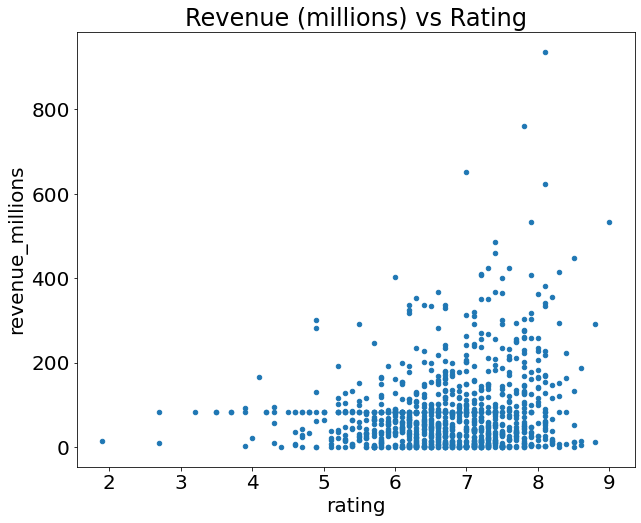

In [53]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

What's with the semicolon? It's not a syntax error, just a way to hide the `<matplotlib.axes._subplots.AxesSubplot at 0x26613b5cc18>` output when plotting in Jupyter notebooks.

If we want to plot a simple Histogram based on a single column, we can call plot on a column:

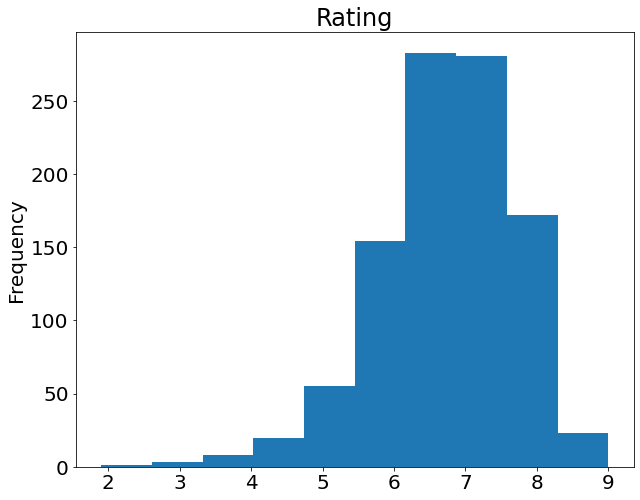

In [54]:
movies_df['rating'].plot(kind='hist', title='Rating');

Do you remember the `.describe()` example at the beginning of this tutorial? Well, there's a graphical representation of the interquartile range, called the Boxplot. Let's recall what `describe()` gives us on the ratings column:

In [55]:
movies_df['rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: rating, dtype: float64

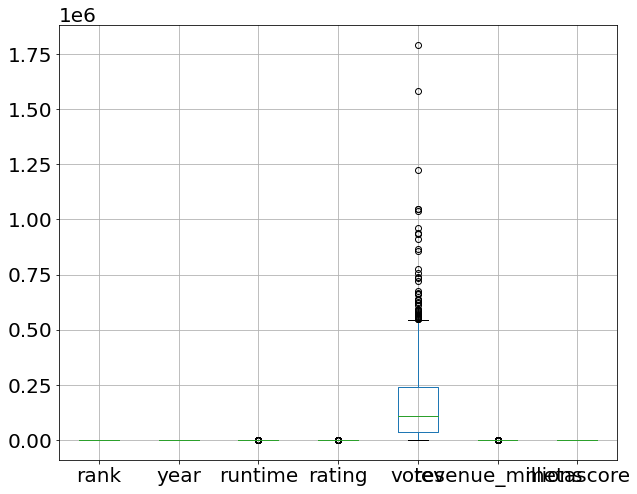

In [56]:
movies_df.boxplot();